## Importing Libraries

In [1]:
import pandas as pd   
import matplotlib.pyplot as plt
import plotly.express as px
import time
import numpy as np
import warnings

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE,SelectFromModel


from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# the permutation based importance
import seaborn as sns
from sklearn.inspection import permutation_importance

from numpy import mean
import warnings
warnings.filterwarnings("ignore") 

## Loading Dataset

In [2]:
# Importing Dataset using Pandas.
data = pd.read_csv("Covid_19_Dataset.csv")
data.shape  

(278848, 10)

In [3]:
data.head(10)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other
5,2020-04-30,1,0,0,0,0,negative,None,female,Other
6,2020-04-30,1,1,0,0,0,negative,None,male,Abroad
7,2020-04-30,0,0,0,0,0,negative,None,female,Other
8,2020-04-30,0,0,0,0,0,negative,None,male,Other
9,2020-04-30,0,0,0,0,0,negative,None,male,Contact with confirmed


In [4]:
# Distribution of Target Variable.
dictribution = data["corona_result"].value_counts()
dictribution

negative    260227
positive     14729
other         3892
Name: corona_result, dtype: int64

## Data Preprocessing

In [5]:
# Checking Shape of the dataset.
print('Length of Dataset: ', data.shape[0])
print('Number of Attributes: ', data.shape[1])

Length of Dataset:  278848
Number of Attributes:  10


In [6]:
# Checking Data Types of every column.
data.dtypes

test_date              object
cough                  object
fever                  object
sore_throat            object
shortness_of_breath    object
head_ache              object
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

In [7]:
data.describe()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
count,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,51,5,5,5,5,5,3,3,3,3
top,2020-04-20,0,0,0,0,0,negative,None,female,Other
freq,10921,121649,133942,260664,261079,260079,260227,127320,130158,242741


In [8]:
# Checking Null values in all features.
data.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [9]:
# Dropping Unnecessary Column.
data.drop('test_date',axis=1,inplace=True)

In [10]:
data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,negative,None,female,Other
1,1,0,0,0,0,negative,None,female,Other
2,0,1,0,0,0,negative,None,male,Other
3,1,0,0,0,0,negative,None,female,Other
4,1,0,0,0,0,negative,None,male,Other


In [11]:
data['cough'].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [12]:
data['cough'] = data['cough'].replace(r'0', 0)
data['cough'] = data['cough'].replace(r'1', 1)
data['cough'] = data['cough'].replace(r'None', 0)
data['cough'].unique()

array([0, 1], dtype=int64)

In [13]:
data['fever'].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [14]:
data['fever'] = data['fever'].replace(r'0', 0)
data['fever'] = data['fever'].replace(r'None', 0)
data['fever'] = data['fever'].replace(r'1', 1)
data['fever'].unique()

array([0, 1], dtype=int64)

In [15]:
data['sore_throat'].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [16]:
data['sore_throat'] = data['sore_throat'].replace(r'0', 0)
data['sore_throat'] = data['sore_throat'].replace(r'None', 0)
data['sore_throat'] = data['sore_throat'].replace(r'1', 1)
data['sore_throat'].unique()

array([0, 1], dtype=int64)

In [17]:
data['shortness_of_breath'].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [18]:
data['shortness_of_breath'] = data['shortness_of_breath'].replace(r'0', 0)
data['shortness_of_breath'] = data['shortness_of_breath'].replace(r'None', 0)
data['shortness_of_breath'] = data['shortness_of_breath'].replace(r'1', 1)
data['shortness_of_breath'].unique()

array([0, 1], dtype=int64)

In [19]:
data['head_ache'].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [20]:
data['head_ache'] = data['head_ache'].replace(r'0', 0)
data['head_ache'] = data['head_ache'].replace(r'None', 0)
data['head_ache'] = data['head_ache'].replace(r'1', 1)
data['head_ache'].unique()

array([0, 1], dtype=int64)

In [21]:
# now converting string columns into numeric after removing punctuations.
data['cough'] = pd.to_numeric(data['cough'])
data['fever'] = pd.to_numeric(data['fever'])
data['sore_throat'] = pd.to_numeric(data['sore_throat'])
data['shortness_of_breath'] = pd.to_numeric(data['shortness_of_breath'])
data['head_ache'] = pd.to_numeric(data['head_ache'])

In [22]:
data.dtypes

cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

In [23]:
data['corona_result'].unique()

array(['negative', 'positive', 'other'], dtype=object)

In [24]:
data['corona_result'] = data['corona_result'].map({'negative': 0, 'positive': 1, 'other' : 2})
data['corona_result'] = pd.to_numeric(data['corona_result'])

In [25]:
data['age_60_and_above'].unique()

array(['None', 'Yes', 'No'], dtype=object)

In [26]:
data['age_60_and_above'] = data['age_60_and_above'].map({'No': 0, 'Yes': 1, 'None' : 0})
data['age_60_and_above'] = pd.to_numeric(data['age_60_and_above'])

In [27]:
data['gender'].unique()

array(['female', 'male', 'None'], dtype=object)

In [28]:
data['gender'] = data['gender'].map({'female': 0, 'male': 1, 'None' : 3})
data['gender'] = pd.to_numeric(data['gender'])

In [29]:
data['gender'].unique()

array([0, 1, 3], dtype=int64)

In [30]:
data['test_indication'].unique()

array(['Other', 'Abroad', 'Contact with confirmed'], dtype=object)

In [31]:
data['test_indication'] = data['test_indication'].map({'Other': 0, 'Abroad': 1, 'Contact with confirmed' : 2})
data['test_indication'] = pd.to_numeric(data['test_indication'])

In [32]:
data.dtypes

cough                  int64
fever                  int64
sore_throat            int64
shortness_of_breath    int64
head_ache              int64
corona_result          int64
age_60_and_above       int64
gender                 int64
test_indication        int64
dtype: object

In [33]:
data['corona_result'] = data['corona_result'].replace(2, 0)
data['corona_result'].unique()

array([0, 1], dtype=int64)

## Exploratory Data Analysis

Here we are performing EDA to gain insights and understanding of the data we are working with.

In [34]:
data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0


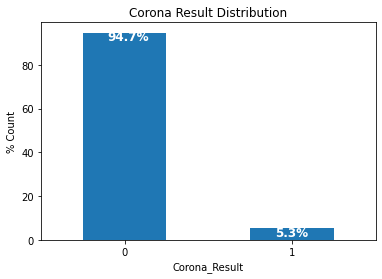

In [35]:
ax = (data['corona_result'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True,rot = 0)
ax.set_ylabel('% Count')
ax.set_xlabel('Corona_Result')
ax.set_ylabel('% Count')
ax.set_title('Corona Result Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

In [36]:
# Counting Number of Class.
dictribution = data["corona_result"].value_counts()
dictribution

0    264119
1     14729
Name: corona_result, dtype: int64

We can see that distribution of class label is imbalanced in our dataset. There are 264119 records are negative and 14729 records of positives.We have 2 classes so its a binary class classififcation task. Now plotting this distribution in graphical form.

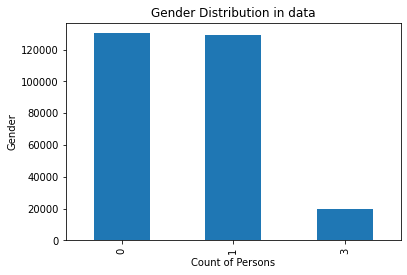

In [37]:
# Let's calculate the percentage of Gender of Patients.
data['gender'].value_counts()

#plot the bar graph of categories
data['gender'].value_counts().plot.bar()
plt.title("Gender Distribution in data")
plt.xlabel("Count of Persons")
plt.ylabel("Gender")
plt.show()

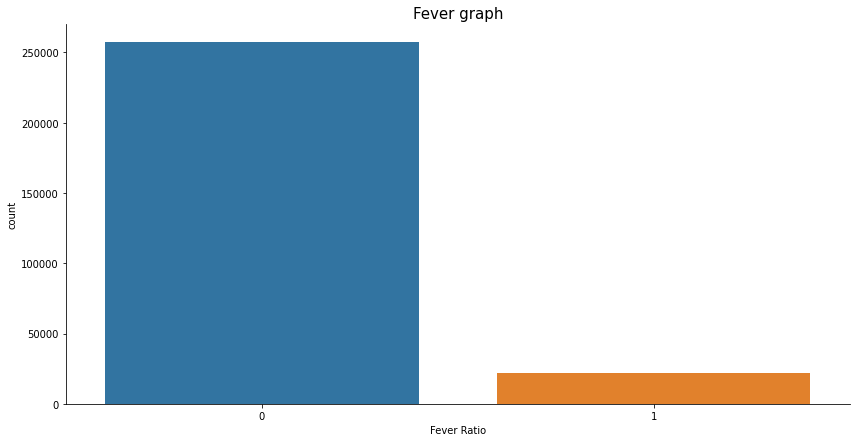

In [38]:
# Fever graph
import seaborn as sns
sns.factorplot(data=data, x='fever', kind= 'count',size=6,aspect=2)
plt.xlabel('Fever Ratio')
plt.title("Fever graph",fontsize=15)
plt.show()

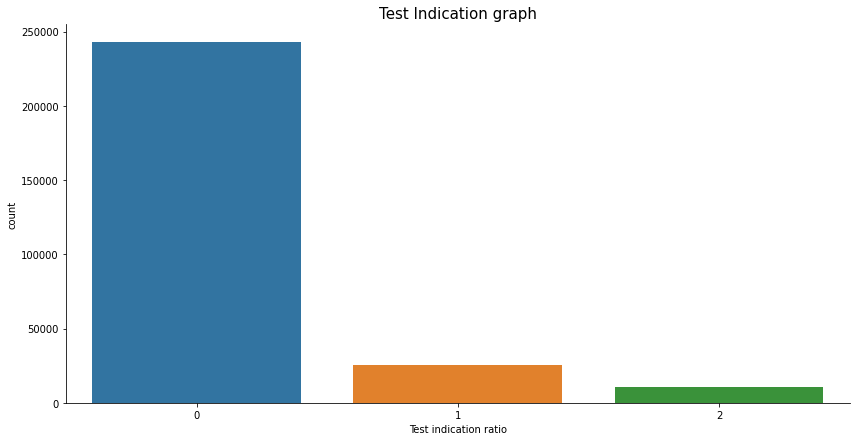

In [39]:
# test indication graph
import seaborn as sns
sns.factorplot(data=data, x='test_indication', kind= 'count',size=6,aspect=2)
plt.xlabel('Test indication ratio')
plt.title("Test Indication graph",fontsize=15)
plt.show()

'Other': 0, 'Abroad': 1, 'Contact with confirmed' : 2

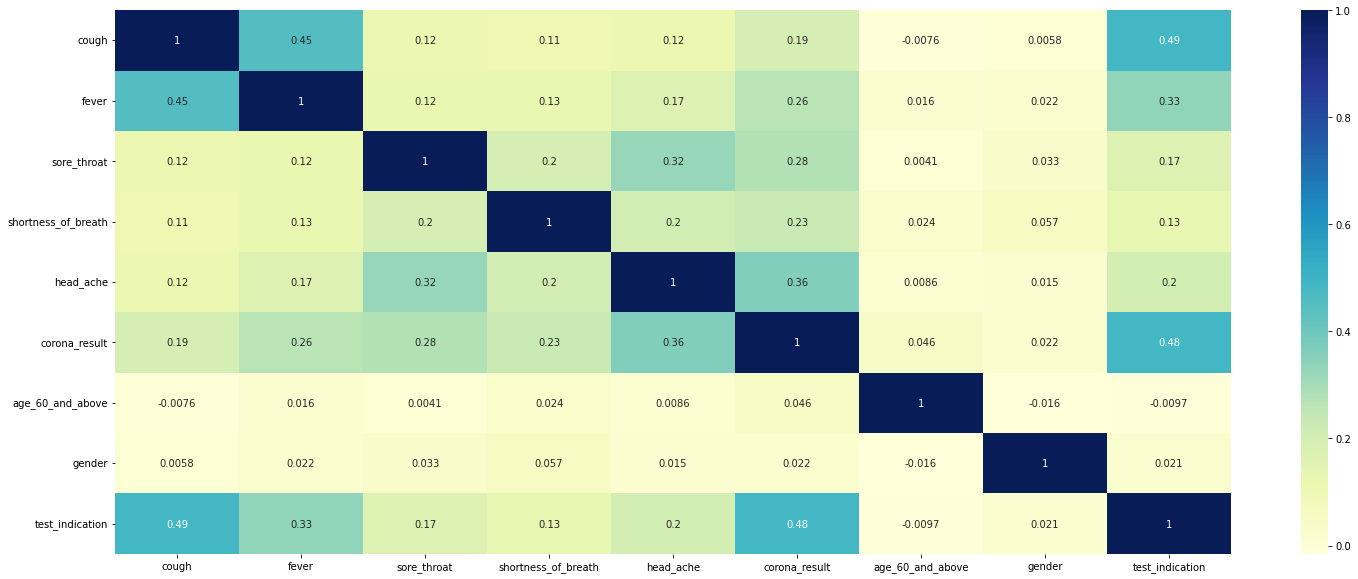

In [40]:
#Now lets try plotting the correlation heatmap

plt.figure(figsize = (25,10))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

plt.show()

### Splitting Dataset into Train-Test sets with 70-30% Ratio

In [72]:
X = data.loc[:, data.columns != 'corona_result']
y = data[['corona_result']]

In [73]:
from sklearn.model_selection import train_test_split
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(195193, 8)
(195193, 1)
(83655, 8)
(83655, 1)


In [82]:
trainX.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication
198020,0,0,0,0,0,0,3,0
43036,0,0,0,0,0,0,0,0
163420,0,0,0,0,0,0,1,0
30322,0,0,0,0,0,0,0,0
256523,1,0,0,0,0,1,1,0


In [74]:
features = trainX.columns
print(features)

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'age_60_and_above', 'gender', 'test_indication'],
      dtype='object')


## Applying Machine Learning Models

### Logistic Regression

[0.96009221 0.96034836 0.96019467 0.96065372 0.9599877  0.96295917
 0.96039756 0.96270301 0.96203699 0.96152467]
Accuracy Logistic Regression KFold with k=10: 96.11%
[[183909   1044]
 [  6551   3689]]


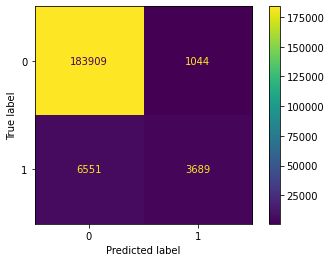

In [44]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=10, random_state=100, shuffle=True)

lr = LogisticRegression(solver='liblinear',random_state=2)
results_kfold = cross_val_score(lr, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy Logistic Regression KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(lr, trainX, trainy.values.ravel(), cv=10)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [45]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(trainX,trainy.values.ravel())
y_pred = lr.predict(testX)

Confusion Matrix:
[[78777   389]
 [ 2922  1567]]
------------------------------------
AUC Score: 0.6720808961717282
------------------------------------
Accuracy of Logistic Regression: 96.04207758053911 %
------------------------------------
Recall: 0.34907551793272446
------------------------------------
Precision: 0.8011247443762781
------------------------------------
Specificity: 0.9950862744107318
------------------------------------
Sensitivity: 0.34907551793272446
------------------------------------
Miss Rate (False Positive Rate): 0.00491372558926812
------------------------------------
Miss Rate (False Negative Rate): 0.6509244820672756
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     79166
           1       0.80      0.35      0.49      4489

    accuracy                           0.96     83655
   macro avg       0.88      0.67      0.73     83655
weighted avg       0.96      0.96      0.95     83655



Text(0.5, 1.0, 'Contribution of features in Model Performance')

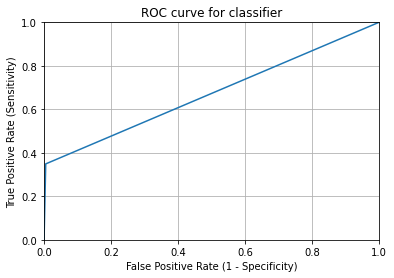

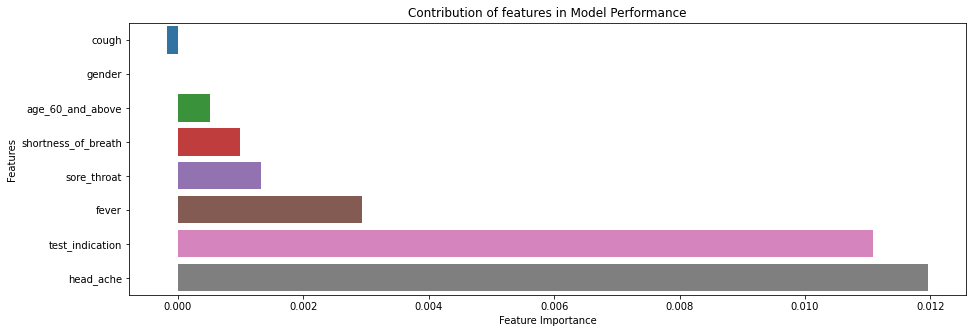

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = lr.score(testX, testy)
print("Accuracy of Logistic Regression:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

from sklearn.metrics import classification_report
print(classification_report(testy,y_pred))

from sklearn import metrics
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


perm_importance = permutation_importance(lr, testX, testy)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### XGBoost Classifier

[0.96726434 0.96921107 0.96849385 0.96628926 0.96757006 0.96946565
 0.96777499 0.9703366  0.96961935 0.96972181]
Accuracy of XGBOOST KFold with k=10: 96.86%
[[183384   1569]
 [  4604   5636]]


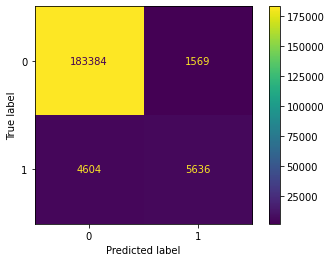

In [47]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

xgb = XGBClassifier(learning_rate = 0.75, max_depth = 5)
results_kfold = cross_val_score(xgb, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of XGBOOST KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(xgb, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [75]:
xgb = XGBClassifier(learning_rate = 0.75, max_depth = 5)
xgb.fit(trainX,trainy.values.ravel())
y_pred = xgb.predict(testX)

In [83]:
trainX.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication
198020,0,0,0,0,0,0,3,0
43036,0,0,0,0,0,0,0,0
163420,0,0,0,0,0,0,1,0
30322,0,0,0,0,0,0,0,0
256523,1,0,0,0,0,1,1,0


Confusion Matrix:
[[78562   604]
 [ 2103  2386]]
------------------------------------
AUC Score: 0.7619459795298488
------------------------------------
Accuracy of XGBOOST: 96.76409061024445 %
------------------------------------
Recall: 0.5315214969926487
------------------------------------
Precision: 0.7979933110367893
------------------------------------
Specificity: 0.9923704620670489
------------------------------------
Sensitivity: 0.5315214969926487
------------------------------------
Miss Rate (False Positive Rate): 0.007629537932951015
------------------------------------
Miss Rate (False Negative Rate): 0.4684785030073513


Text(0.5, 1.0, 'Contribution of features in Model Performance')

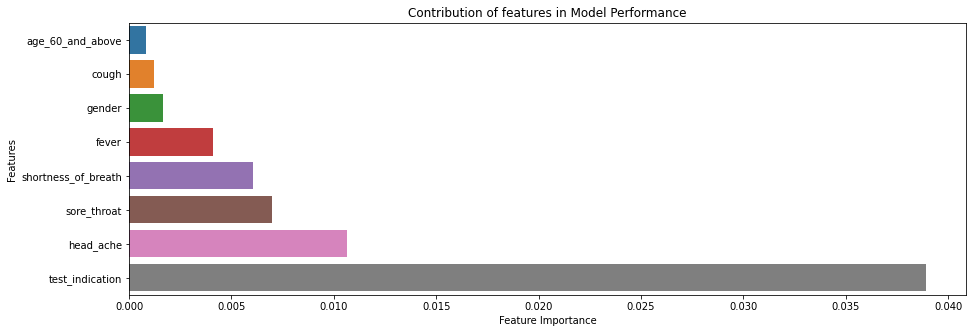

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = xgb.score(testX, testy)
print("Accuracy of XGBOOST:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)


perm_importance = permutation_importance(xgb, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")



In [80]:
trainX.tail()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication
33867,0,0,0,0,0,0,1,0
84434,1,0,0,0,0,0,1,0
95816,0,0,0,0,0,0,1,0
203245,0,0,0,0,0,0,1,0
100879,0,0,0,0,0,0,0,0


In [77]:
import pickle
pickle_out = open("xgb.pkl","wb")
pickle.dump(xgb, pickle_out)
pickle_out.close()

### Decision Tree Classifier

[0.96716189 0.96890369 0.96839139 0.96623802 0.96751883 0.96936318
 0.96762129 0.97043906 0.96987551 0.96997797]
Accuracy of DECISION TREE KFold with k=10: 96.85%
[[183431   1522]
 [  4681   5559]]


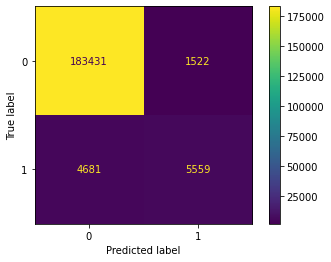

In [50]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

DT = DecisionTreeClassifier(max_depth=200)
results_kfold = cross_val_score(DT, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of DECISION TREE KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(DT, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [51]:
DT = DecisionTreeClassifier(max_depth=125)
DT.fit(trainX,trainy)
y_pred = DT.predict(testX) 

Confusion Matrix:
[[78563   603]
 [ 2120  2369]]
------------------------------------
AUC Score: 0.7600587778853176
------------------------------------
Accuracy of Decision Tree: 96.74496443727213 %
------------------------------------
Recall: 0.5277344620182669
------------------------------------
Precision: 0.7971063257065949
------------------------------------
Specificity: 0.9923830937523684
------------------------------------
Sensitivity: 0.5277344620182669
------------------------------------
Miss Rate (False Positive Rate): 0.007616906247631559
------------------------------------
Miss Rate (False Negative Rate): 0.47226553798173315


Text(0.5, 1.0, 'Contribution of features in Model Performance')

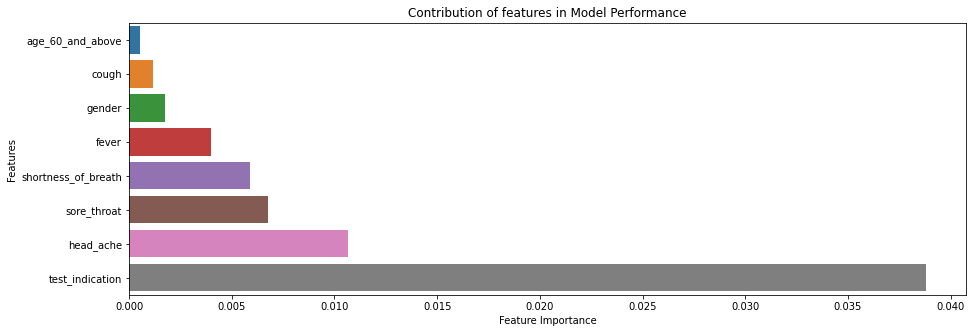

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = DT.score(testX, testy)
print("Accuracy of Decision Tree:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

perm_importance = permutation_importance(DT, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### Random Forest Classifier

[0.96731557 0.96921107 0.96859631 0.96644295 0.96777499 0.96956811
 0.96782622 0.97043906 0.96987551 0.96977304]
Accuracy of Random Forest KFold with k=10: 96.87%
[[183403   1550]
 [  4616   5624]]


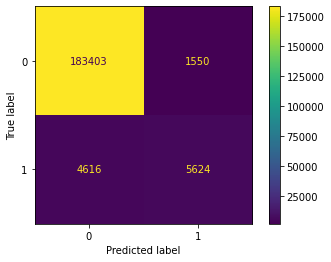

In [53]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

rf = RandomForestClassifier(max_depth=10,n_estimators = 120)
results_kfold = cross_val_score(rf, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of Random Forest KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(rf, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [54]:
rf = RandomForestClassifier(max_depth=10,n_estimators = 1200)
rf.fit(trainX,trainy.values.ravel())
y_pred = rf.predict(testX)

Confusion Matrix:
[[78563   603]
 [ 2109  2380]]
------------------------------------
AUC Score: 0.7612839950829118
------------------------------------
Accuracy of Random Forest: 96.75811368119061 %
------------------------------------
Recall: 0.5301848964134551
------------------------------------
Precision: 0.7978545088836742
------------------------------------
Specificity: 0.9923830937523684
------------------------------------
Sensitivity: 0.5301848964134551
------------------------------------
Miss Rate (False Positive Rate): 0.007616906247631559
------------------------------------
Miss Rate (False Negative Rate): 0.4698151035865449
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     79166
           1       0.80      0.53      0.64      4489

    accuracy                           0.97     83655
   macro avg       0.89      0.76      0.81     83655
weighted avg       0.96      0.97      0.96     83655



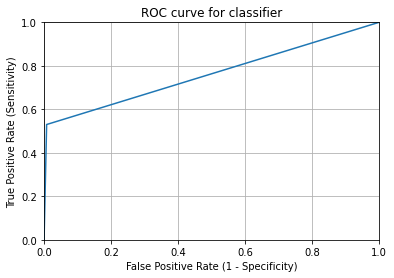

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = rf.score(testX, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)


print(classification_report(testy,y_pred))
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### Naive Bayes Classifier

[0.94492828 0.94795082 0.94533811 0.94338849 0.94743583 0.94671858
 0.94482299 0.94635996 0.9457964  0.94825555]
Accuracy of Naive Bayes KFold with k=10: 94.61%
[[177970   6983]
 [  3538   6702]]


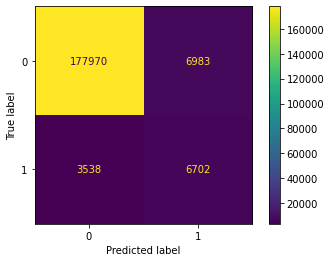

In [56]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

NB = GaussianNB()
results_kfold = cross_val_score(NB, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of Naive Bayes KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(NB, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [57]:
NB = GaussianNB()
NB.fit(trainX,trainy.values.ravel())
y_pred = NB.predict(testX)

Confusion Matrix:
[[76288  2878]
 [ 1594  2895]]
------------------------------------
AUC Score: 0.804277894555756
------------------------------------
Accuracy of Naive Bayes: 94.65423465423466 %
------------------------------------
Recall: 0.6449097794609044
------------------------------------
Precision: 0.5014723713840291
------------------------------------
Specificity: 0.9636460096506075
------------------------------------
Sensitivity: 0.6449097794609044
------------------------------------
Miss Rate (False Positive Rate): 0.036353990349392414
------------------------------------
Miss Rate (False Negative Rate): 0.35509022053909556


Text(0.5, 1.0, 'Contribution of features in Model Performance')

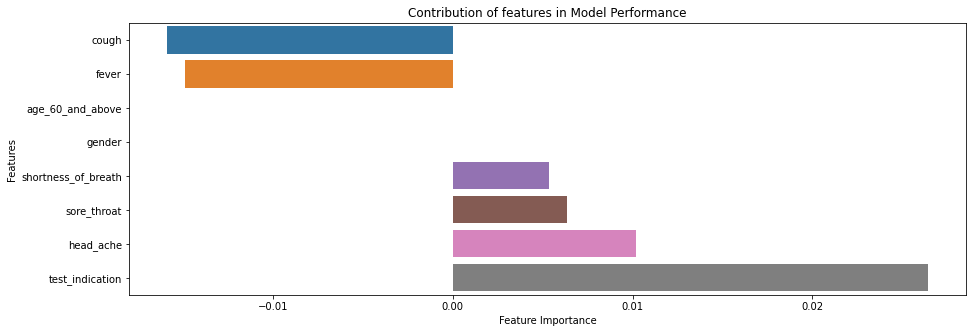

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = NB.score(testX, testy)
print("Accuracy of Naive Bayes:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)


perm_importance = permutation_importance(NB, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### Gradient Boosting Classifier

[0.9661373  0.96849385 0.96731557 0.9658794  0.96700651 0.9689021
 0.96762129 0.96961935 0.96910702 0.9689021 ]
Accuracy of Gradient Boosting KFold with k=10: 96.79%
[[183437   1516]
 [  4773   5467]]


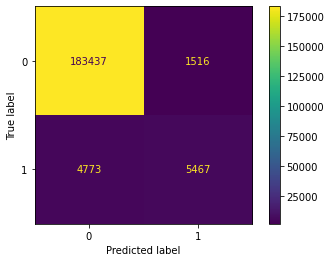

In [59]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=40)
results_kfold = cross_val_score(gb, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of Gradient Boosting KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(gb, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [60]:
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=400)
gb.fit(trainX,trainy.values.ravel())
y_pred = gb.predict(testX)

Confusion Matrix:
[[78592   574]
 [ 2145  2344]]
------------------------------------
AUC Score: 0.7574573527824632
------------------------------------
Accuracy of Gradient Bossting: 96.74974598051521 %
------------------------------------
Recall: 0.5221652929382936
------------------------------------
Precision: 0.8032899246058944
------------------------------------
Specificity: 0.9927494126266326
------------------------------------
Sensitivity: 0.5221652929382936
------------------------------------
Miss Rate (False Positive Rate): 0.007250587373367355
------------------------------------
Miss Rate (False Negative Rate): 0.4778347070617064
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     79166
           1       0.80      0.52      0.63      4489

    accuracy                           0.97     83655
   macro avg       0.89      0.76      0.81     83655
weighted avg       0.96      0.97      0.96     83655



Text(0.5, 1.0, 'Contribution of features in Model Performance')

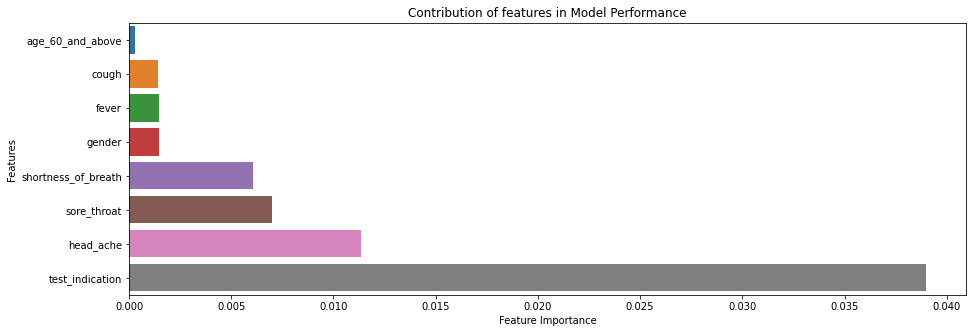

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = gb.score(testX, testy)
print("Accuracy of Gradient Bossting:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

perm_importance = permutation_importance(gb, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### Voting Classifier (Ensemble Models) - Best Performing Model

In [62]:
r0 = GradientBoostingClassifier(learning_rate = 0.01,max_depth=5,n_estimators=400)
r1 = RandomForestClassifier(max_depth=10,n_estimators = 1200)
r2 = XGBClassifier(learning_rate = 0.85, max_depth = 2)
r3 = GaussianNB()

# In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class
voting = VotingClassifier([('gb1', r0),('gb2', r1),('gb3', r2),('gb4', r3)], voting='soft')
voting.fit(trainX,trainy.values.ravel())
y_pred_voting = voting.predict(testX)

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred_voting)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred_voting)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = voting.score(testX, testy)
print("Accuracy of Voting Classifier:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred_voting)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred_voting)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)



Confusion Matrix:
[[78153  1013]
 [ 1716  2773]]
------------------------------------
AUC Score: 0.8024681685610133
------------------------------------
Accuracy of Voting Classifier: 96.73779212240751 %
------------------------------------
Recall: 0.6177322343506348
------------------------------------
Precision: 0.7324352879027998
------------------------------------
Specificity: 0.9872041027713918
------------------------------------
Sensitivity: 0.6177322343506348
------------------------------------
Miss Rate (False Positive Rate): 0.01279589722860824
------------------------------------
Miss Rate (False Negative Rate): 0.3822677656493651


### Saving Best Model

In [64]:
import pickle
pickle_out = open("voting.pkl","wb")
pickle.dump(voting, pickle_out)
pickle_out.close()

## Feature Selection Using Corellation Matrix

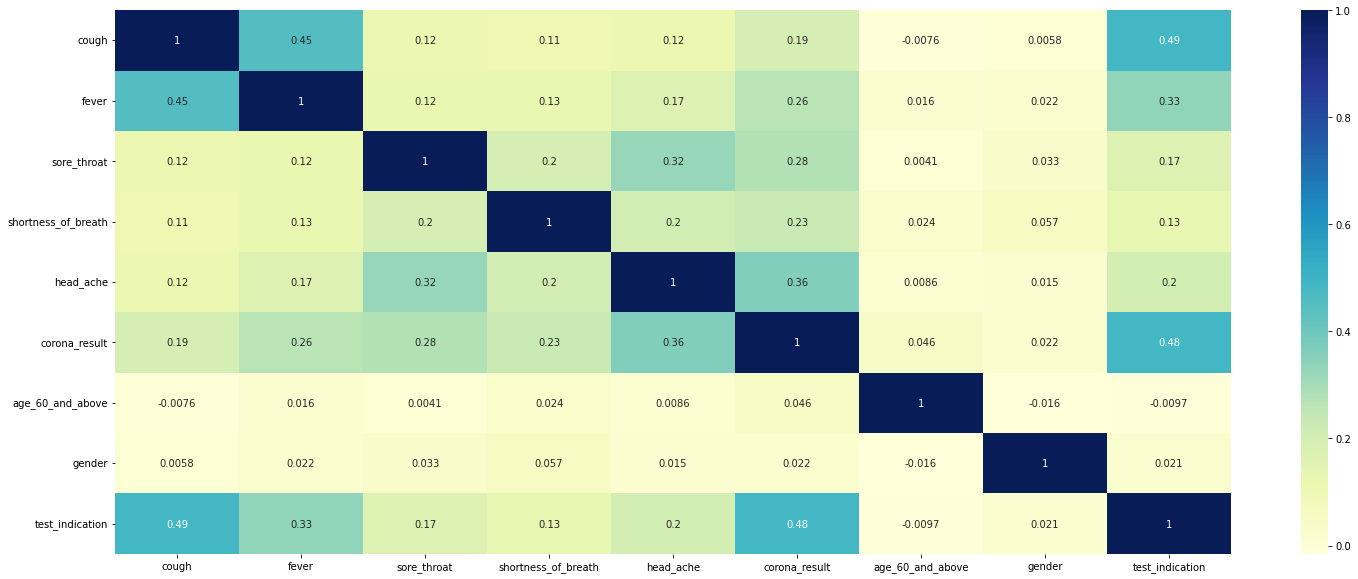

In [65]:
#Now lets try plotting the correlation heatmap

plt.figure(figsize = (25,10))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

plt.show()

In [66]:
X = data[['test_indication','head_ache','shortness_of_breath','sore_throat','fever']]
y = data[['corona_result']]

In [67]:
from sklearn.model_selection import train_test_split
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(195193, 5)
(195193, 1)
(83655, 5)
(83655, 1)


In [68]:
features = trainX.columns
print(features)

Index(['test_indication', 'head_ache', 'shortness_of_breath', 'sore_throat',
       'fever'],
      dtype='object')


## Applying Machine Learning Algorithm After Feature Selection

In [69]:
# Random Forest Classifier
rf = RandomForestClassifier(max_depth=10,n_estimators = 400)
rf.fit(trainX, trainy)
y_pred_rf = rf.predict(testX)
rf_acc = accuracy_score(testy, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)
AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)

print('------------------------------------------------------------')

# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=8, max_features='auto')
dt.fit(trainX, trainy)
y_pred_dt = dt.predict(testX)
dt_acc = accuracy_score(testy, y_pred_dt)
print("Decision Tree Accuracy:", dt_acc)


print('------------------------------------------------------------')

# XGBoost Classifier
xgb = XGBClassifier(learning_rate = 0.01, max_depth = 5)
xgb.fit(trainX, trainy)
y_pred_xgb = xgb.predict(testX)
xgb_acc = accuracy_score(testy, y_pred_xgb)
print("XGBoost Accuracy:", xgb_acc)


print('------------------------------------------------------------')

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=250)
gb.fit(trainX, trainy)
y_pred_gb = gb.predict(testX)
gb_acc = accuracy_score(testy, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_acc)

print('------------------------------------------------------------')

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(trainX, trainy)
y_pred_knn = knn.predict(testX)
knn_acc = accuracy_score(testy, y_pred_knn)
print("KNN Accuracy:", knn_acc* 100)


Random Forest Accuracy: 0.9662423047038432
AUC Score: 0.7574573527824632
------------------------------------------------------------
Decision Tree Accuracy: 0.9662183969876278
------------------------------------------------------------
XGBoost Accuracy: 0.9662183969876278
------------------------------------------------------------
Gradient Boosting Accuracy: 0.9659793198254737
------------------------------------------------------------
KNN Accuracy: 96.62183969876278


In [70]:
r0 = GradientBoostingClassifier(learning_rate = 0.01,max_depth=5,n_estimators=400)
r1 = RandomForestClassifier(max_depth=10,n_estimators = 1200)
r2 = XGBClassifier(learning_rate = 0.85, max_depth = 2)
r3 = GaussianNB()

# In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class
voting = VotingClassifier([('gb1', r0),('gb2', r1),('gb3', r2),('gb4', r3)], voting='soft')
voting.fit(trainX,trainy.values.ravel())
y_pred_voting = voting.predict(testX)

In [71]:
accuracy = voting.score(testX, testy)
print("Accuracy of Voting Classifier:",accuracy*100,"%")

Accuracy of Voting Classifier: 96.60749506903353 %


## Conclusion

So after applying different models of machine learning and performing feature engineering we have concluded that all the features in the datset is positively correlated with the target attribute. We are getting our best which is Voting Classifier with full 8 features.

After feature selection and selecting sub set of features is not much impacting the results.